# Solving for the Fishbone-Moncrief Torus

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Setting Constants

In [2]:
# defining some constants; G = c = 1

a = 0.5 # spin; |a| < 1
q = 0 # charge; 0 < q < 1; a^2 + q^2 < 1
M = 1 # mass;
rs = 2*M # schwarzchild radius; rs = 2GM/c^2

th0 = np.pi/2.

rh = M + np.sqrt(M**2 - a**2 - q**2) # radius of event horizon

rin = 3

In [3]:
# define coordinate grid: r x theta x phi = 100 x 100 x 100

## all arrays should have dimensions r x theta x phi

n1 = 10000 # cells in the r direction
n2 = 400 # cells in the theta (polar coordinate) direction
n3 = 1 # cells in the phi direction

## Creating Our Coordinate Grid

In [4]:
## defining the metric

# creating the metric array (g_mu_nu)
g = np.zeros((4,4,n1,n2,n3))


sm = 0.001
rmax = 1000

r = np.zeros((n1,n2,n3))
th = np.zeros((n1,n2,n3))
ph = np.zeros((n1,n2,n3))

r_ = np.logspace(np.log10(rh+sm), np.log10(rmax), n1, base = 10.0)
th_ = np.linspace(sm, np.pi-sm, n2)
ph_ = np.linspace(sm, 2*np.pi-sm,n3)

In [5]:
for j in range(n2):
    for k in range(n3):
        r[:,j,k] = r_
        
for i in range(n1):
    for k in range(n3):
        th[i,:,k] = th_        

for i in range(n1):
    for j in range(n2):
        ph[i,j,:] = ph_

## Defining Quantities

In [6]:
delta = r**2 - 2*M*r + a**2 + q**2 # (FM 3.5)
sigma = r**2 + a**2 * np.cos(th)**2 # (FM 3.5)
A = (r**2 + a**2)**2 - delta*a**2*(np.sin(th)**2) # (FM 3.5)


# constants for the inner edge of the accretion disk
delta0 = rin**2 - 2*M*rin + a**2 + q**2 # (FM 3.5)
sigma0 = rin**2 + a**2 * np.cos(th0)**2 # (FM 3.5)
A0 = (rin**2 + a**2)**2 - delta0*(a**2)*(np.sin(th0)**2)

## Defining Metric

In [7]:
## kerr-newman metric in BL coordinates. 

g[0][0] = 2*r/sigma - 1 # dt^2
g[0][1] = 0 # dt dr
g[0][2] = 0 # dt dtheta
g[0][3] = -2*M*a*r*(np.sin(th)**2)/sigma # dt dphi

g[1][0] = 0 # dr dt
g[1][1] = sigma/delta # dr^2
g[1][2] = 0 # dr dtheta
g[1][3] = 0 # dr dphi

g[2][0] = 0 # dtheta dt
g[2][1] = 0 # dtheta dr
g[2][2] = sigma # dtheta^2
g[2][3] = 0 # dtheta dphi

g[3][0] = -2*M*a*r*(np.sin(th)**2)/sigma # dphi dt
g[3][1] = 0 # dphi dr
g[3][2] = 0 # dphi dtheta
g[3][3] = A*(np.sin(th)**2)/sigma # dphi^2

# metric is symmetric g[i][j] = g[j][i]

## determinant of the matrix is given by
gdet = - sigma**2 * np.sin(th)**2

## Calculating Enthalpy

In [8]:
# defining formulas for enthalpy


## angular momentum definition from FM 3.7
top = r**4 + r**2 * a**2 - 2*M*r*a**2 - a*((M*r)**0.5) * (r**2 - a**2)
bot = r**2 - 3*M*r + 2*a*(M*r)**0.5

l = (M/r**3)**0.5 * (top/bot)


## FM (3.5)
e_2nu = sigma*delta/A
e_2psi = np.sin(th)**2 * A/sigma
e_neg2chi = e_2nu/e_2psi
w = 2*a*M*r/A

var_a = np.sqrt(1+ l**2*sigma**2*delta/((A*np.sin(th)**2)**2))
var_b = 0.5*np.log((1+var_a)/e_2nu)
var_c = - 0.5*var_a
var_d = - w*l

lnh1 = var_b + var_c + var_d ## (Fishbone Moncrief 3.5)


e_2nu0 = sigma0*delta0/A0
e_2psi0 = np.sin(th0)**2 * A0/sigma0
e_neg2chi0 = e_2nu0/e_2psi0
w = 2*a*M*rin/A0

var_a = np.sqrt(1+ l**2*sigma0**2*delta0/((A0*np.sin(th0)**2)**2))
var_b = 0.5*np.log((1+var_a)/e_2nu0)
var_c = - 0.5*var_a
var_d = - w*l

lnh0 = var_b + var_c + var_d ## (Fishbone Moncrief 3.5)

lnh = lnh1 + lnh0 ## (Fishbone Moncrief 3.5)

h = np.e**lnh

### Plotting Enthalpy Contours

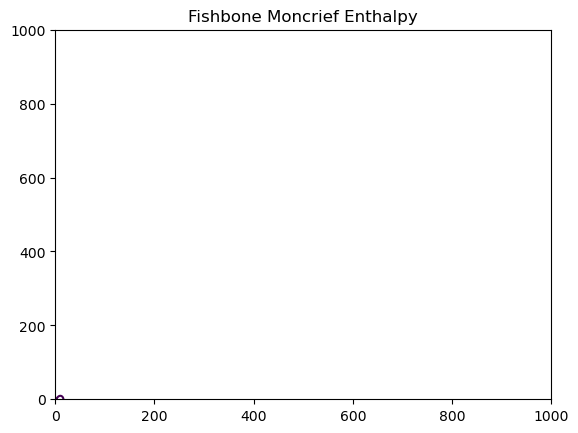

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fmin = np.percentile(lnh, 35)
fmax = np.percentile(lnh, 95)
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contour(x, y, lnh[:,:,0], [0.01])
ax.set_xlim(0,rmax)
ax.set_ylim(0,rmax)

ax.set_title('Fishbone Moncrief Enthalpy')

circle1 = plt.Circle((0, 0), rh, color ='black')
ax.add_patch(circle1)

Text(0.5, 1.0, '$\\ln(h)$')

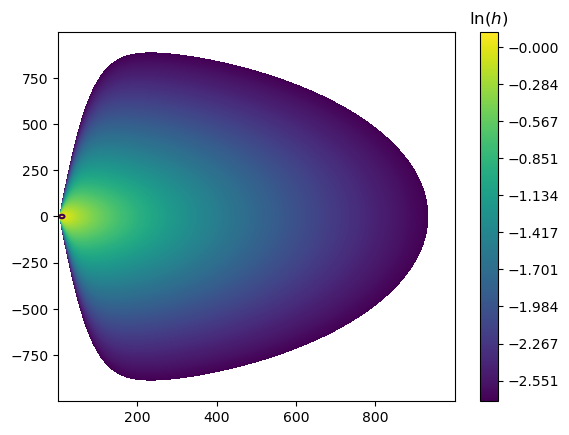

In [11]:
fmin = np.percentile(lnh, 15)
fmax = np.percentile(lnh, 95)
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, lnh[:,:,0], levels = levels)
ax.contour(x, y, lnh[:,:,0], [0.01])

cbar = fig.colorbar(CS)
cbar.ax.set_title(r'$\ln(h)$')
# Add the contour line levels to the colorbar

In [ ]:
fmin = np.percentile(lnh, 15)
fmax = np.percentile(lnh, 95)
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, lnh[:,:,0], levels = levels)

## Converting Enthalpy into Meaningful Values

We have 3 equations to relate $h, \epsilon, P$ and $\rho$. We know the enthalpy $h$ and now we can solve for the other 3 algebraically:

$$h = 1 + \epsilon + \frac{P}{\rho}$$

$$P = k\rho^{\Gamma - 1}$$

$$P = (\Gamma - 1)\rho \epsilon$$

Where $\Gamma$ and $\k$ are known constants. The results are: 

$$\epsilon = \frac{h-1}{\Gamma}$$

$$\rho = (\frac{(h-1)(\Gamma-1)}{\Gamma k})^{\frac{1}{\Gamma -1}}$$

$$ P = k (\frac{(h-1)(\Gamma-1)}{\Gamma k})^{\frac{\Gamma}{\Gamma -1}}$$

In [ ]:
gam = 5./3.
k = 1

In [18]:
## implementing equations above

# calculating internal energy
eps = (h-1)/gam

#calculating density
rho = ((h-1)*(gam-1)/gam/k)**(1/(gam-1))

#calculating pressure
P = k*(rho**gam)

/tmp/ipykernel_1618088/3984153351.py:7: RuntimeWarning: invalid value encountered in power
  rho = ((h-1)*(gam-1)/gam/k)**(1/(gam-1))


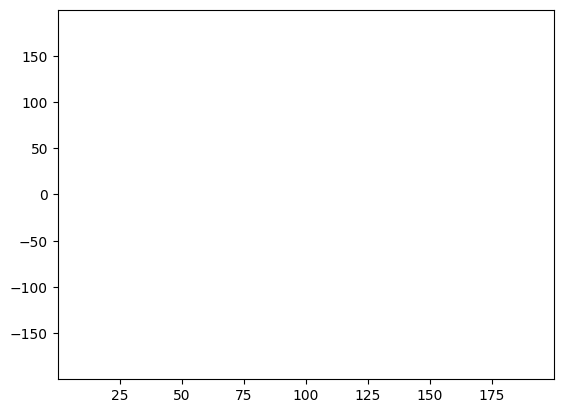

In [19]:
fmin = np.percentile(rho, 15)
fmax = np.percentile(rho, 95)
levels = np.linspace(fmin,fmax,500)

x = r[:,:,0]*np.sin(th[:,:,0])
y = r[:,:,0]*np.cos(th[:,:,0])

fig, ax = plt.subplots()
CS = ax.contourf(x, y, rho[:,:,0], levels = levels)